In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing-data-set/bank-direct-marketing-campaigns.csv


# This data set contains records relevant to a direct marketing campaign of a Portuguese banking institution. The marketing campaign was executed through phone calls. Often, more than one call needs to be made to a single client before they either decline or agree to a term deposit subscription. 

# The classification goal is to predict if the client will subscribe (yes/no) to the term deposit (variable y).

# importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# importing data

In [3]:
df=pd.read_csv('/kaggle/input/bank-marketing-data-set/bank-direct-marketing-campaigns.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [5]:
df.isna().sum().sum()

0

In [6]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
df['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

# droping unnecessary columns

In [8]:
df.drop(['pdays','month','day_of_week','poutcome'],axis=1,inplace=True)

In [9]:
df.head()

,age,job,marital,education,default,housing,loan,contact,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,1,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,1,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,1,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,1,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,1,0,1.1,93.994,-36.4,4.857,5191.0,no


# cnverting columns y to numerical

In [10]:
df['y']=df['y'].replace({'no': 0,'yes':1})

In [11]:
df.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

# counts of the customers who accepted and refused to deposit term

<AxesSubplot:xlabel='y', ylabel='count'>

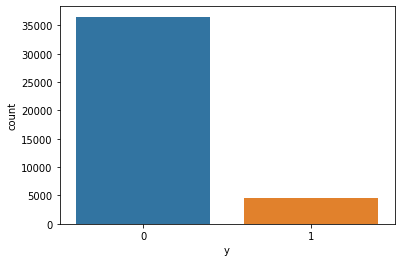

In [12]:
sns.countplot(data=df,x='y')

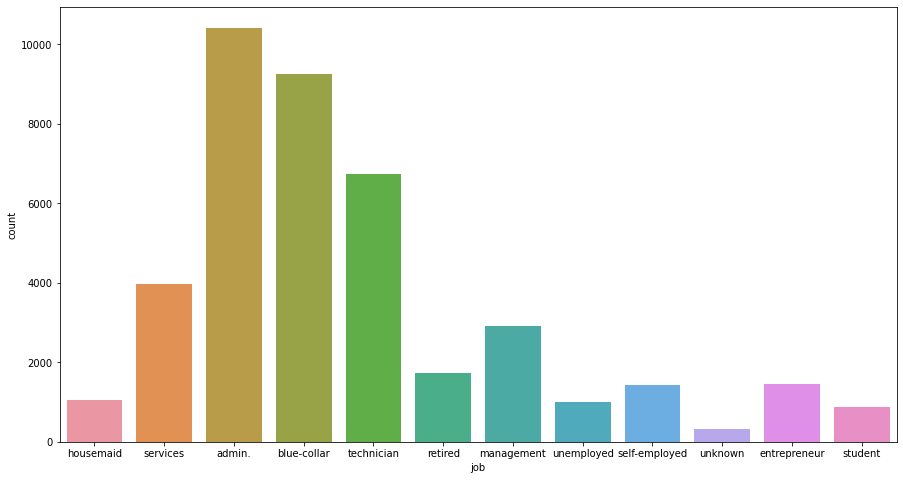

In [13]:
plt.figure(figsize=(15,8))
ax=sns.countplot(data=df,x='job')

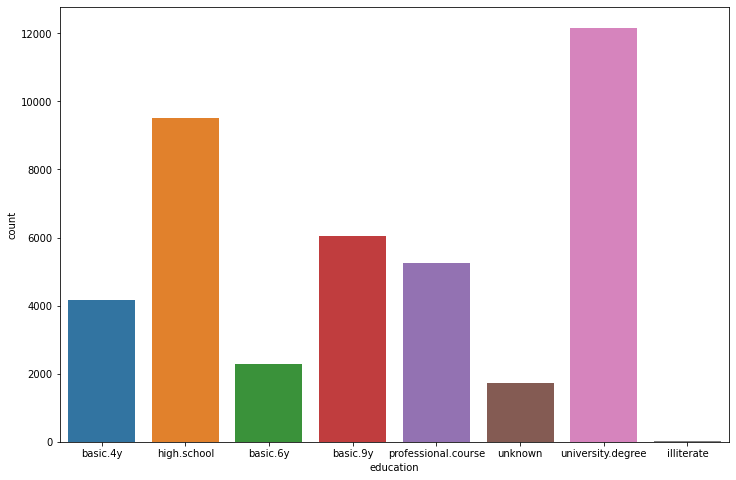

In [14]:
plt.figure(figsize=(12,8))
ax=sns.countplot(data=df,x='education')

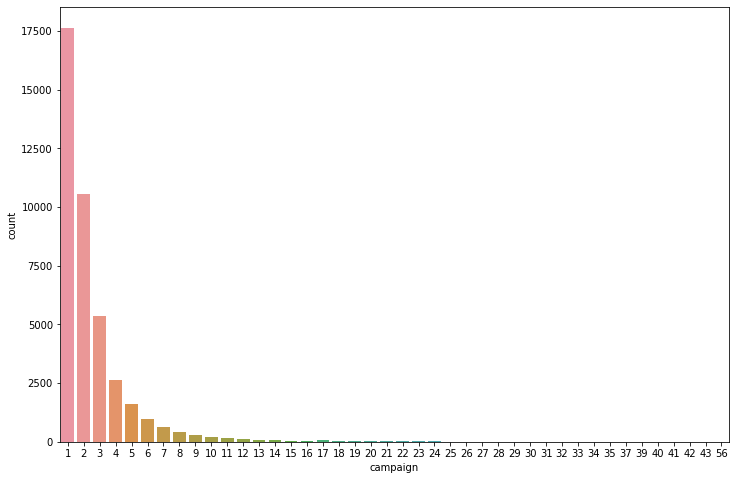

In [15]:
plt.figure(figsize=(12,8))
ax=sns.countplot(data=df,x='campaign')

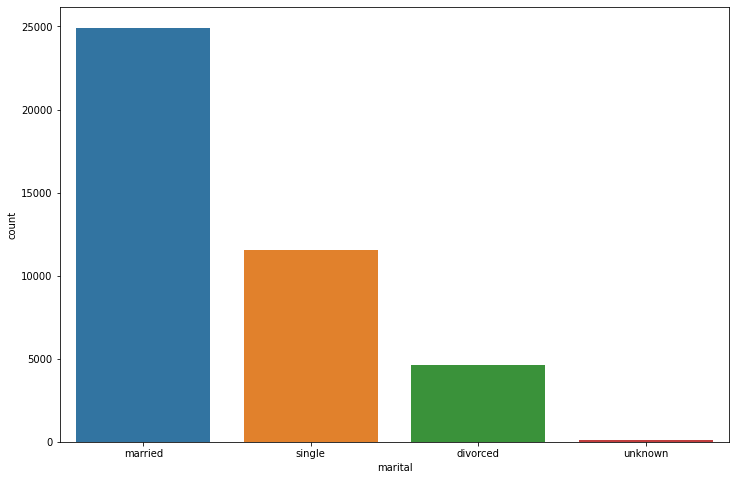

In [16]:
plt.figure(figsize=(12,8))
ax=sns.countplot(data=df,x='marital')

<AxesSubplot:ylabel='housing'>

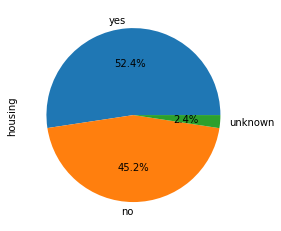

In [17]:
df['housing'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<AxesSubplot:ylabel='loan'>

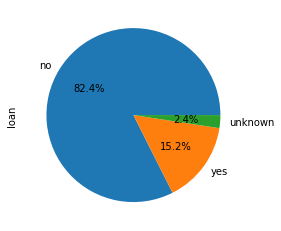

In [18]:
df['loan'].value_counts().plot(kind='pie',autopct='%1.1f%%')

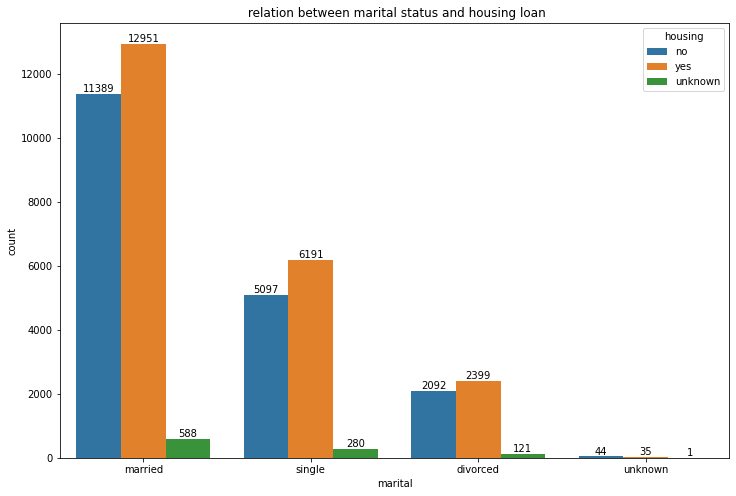

In [19]:
plt.figure(figsize=(12,8))
ax=sns.countplot(data=df,x='marital',hue='housing')
plt.title(' relation between marital status and housing loan')
for bars in ax.containers:
    ax.bar_label(bars)

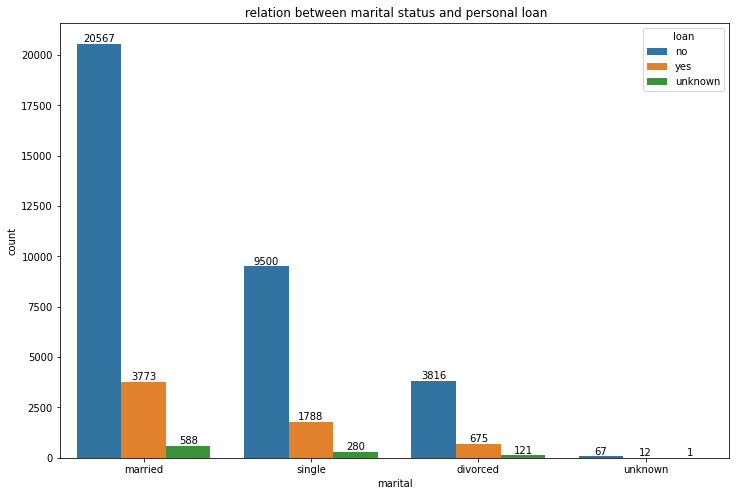

In [20]:
plt.figure(figsize=(12,8))
ax=sns.countplot(data=df,x='marital',hue='loan')
plt.title(' relation between marital status and personal loan')
for bars in ax.containers:
    ax.bar_label(bars)

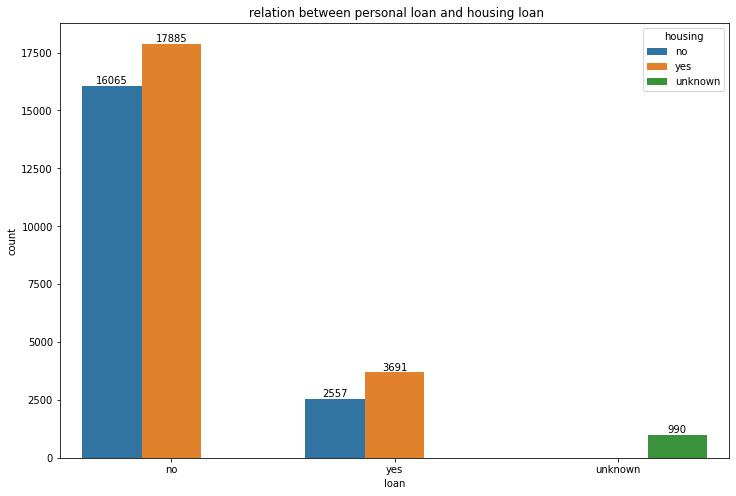

In [21]:
plt.figure(figsize=(12,8))
ax=sns.countplot(data=df,x='loan',hue='housing')
plt.title(' relation between personal loan and housing loan')
for bars in ax.containers:
    ax.bar_label(bars)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'previous'}>],
       [<AxesSubplot:title={'center':'emp.var.rate'}>,
        <AxesSubplot:title={'center':'cons.price.idx'}>,
        <AxesSubplot:title={'center':'cons.conf.idx'}>],
       [<AxesSubplot:title={'center':'euribor3m'}>,
        <AxesSubplot:title={'center':'nr.employed'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

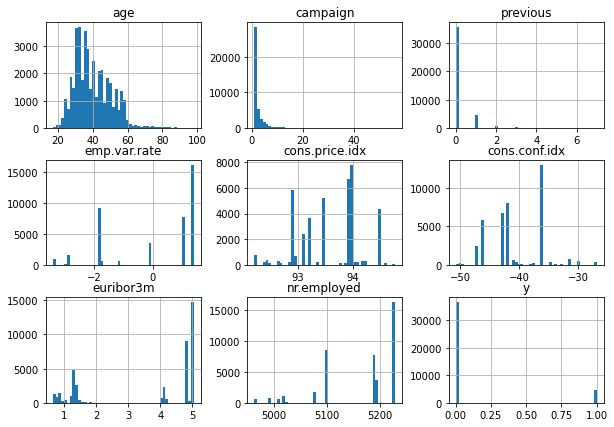

In [22]:
df.hist(bins=50,figsize=(10,7))

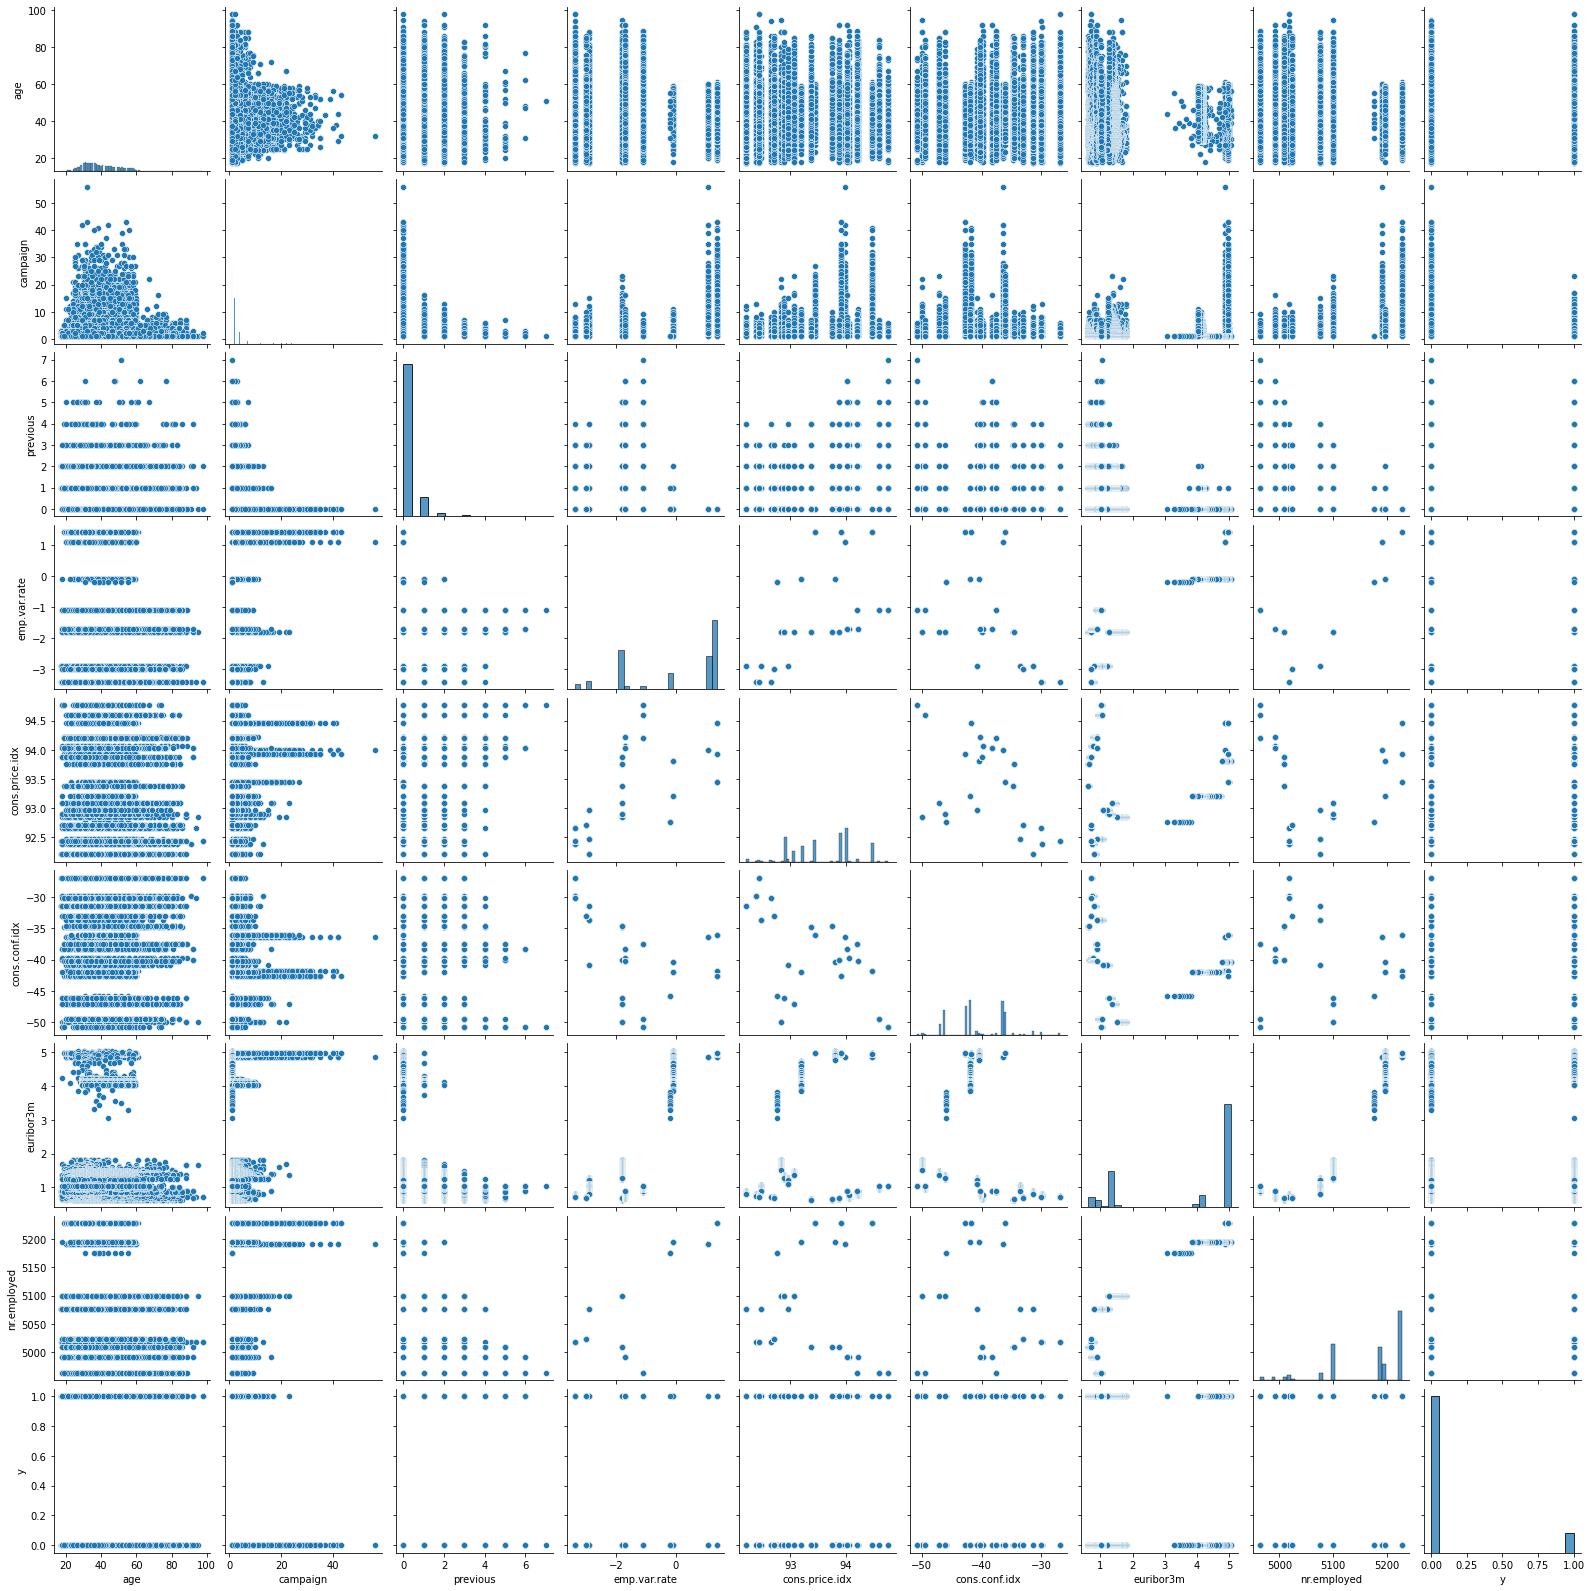

In [23]:
sns.pairplot(df)

In [24]:
df.corr()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.004594,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
campaign,0.004594,1.000000,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
previous,0.024365,-0.079141,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,0.150754,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.127836,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.013733,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,0.135133,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,0.144095,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678
y,0.030399,-0.066357,0.230181,-0.298334,-0.136211,0.054878,-0.307771,-0.354678,1.000000


<AxesSubplot:>

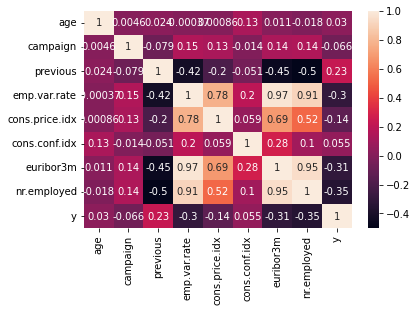

In [25]:
sns.heatmap(df.corr(),annot=True)

In [26]:
df.head(3)

,age,job,marital,education,default,housing,loan,contact,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,1,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,1,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,1,0,1.1,93.994,-36.4,4.857,5191.0,0


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


# converting categorical data to numerical data

In [28]:
df1=pd.get_dummies(df) 

# scaling the data after splitting them to X&y

In [29]:
X=df1.drop('y',axis=1)
y=df1['y']
X=StandardScaler().fit_transform(X)


In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
X_train.shape

(32950, 43)

In [32]:
X_test.shape

(8238, 43)

# training the model with xgb algorithm

In [33]:
from xgboost import XGBClassifier
model=XGBClassifier(n_estimator=1000,learning_rate=.01)
model.fit(X_train,y_train)

[11:13:18] WARNING: ../src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimator=1000,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, ...)

# predicting the data after fit them with xgb

In [34]:
y_pred=model.predict(X_test)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      7795
           1       0.26      0.55      0.35       443

    accuracy                           0.89      8238
   macro avg       0.62      0.73      0.65      8238
weighted avg       0.93      0.89      0.91      8238



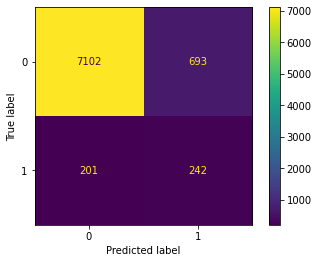

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix(y_pred,y_test))
disp=disp.plot()
print(classification_report(y_pred,y_test))

In [36]:
accuracy_score(y_pred,y_test)
roc_auc_score(y_pred,y_test)
print('XGB model,s accuracy is'+str(accuracy_score(y_pred,y_test)))
print('XGB model,s accuracy is'+str(roc_auc_score(y_pred,y_test)))

XGB model,s accuracy is0.8914785142024764
XGB model,s accuracy is0.7286861259967247


# the accuracy of the model is 89%